# Project 1

In this project, you'll work on a modified version of the [Boston Housing Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

You'll combine data from two files. Then preprocess and clean them before performing the final computation.

Table1:
- ID:       Identifier
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= "Bound" if tract bounds river; "NoBound" otherwise)

Table2:
- ID:       Identifier
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per \$10,000
- PTRATIO:  pupil-teacher ratio by town
- B        1000:(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT:    % lower status of the population
- PRICE:     Median value of owner-occupied homes in $1000's



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_path1 = './housing1.csv'
dataset_path2 = './housing2.csv'

In [3]:
# Read in the two datasets

# Your Code Here
data1 = pd.read_csv(dataset_path1)
data2 = pd.read_csv(dataset_path2)

In [4]:
# Incorporate data from the first DataFrame into the second DataFrame. For that, perform the right kind of join on the common column. 

# Code Here
data = data1.merge(data2, on = "ID", how = "right")
data.describe()

,CRIM,ZN,INDUS,ID,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,294.000000,294.000000,294.000000,300.000000,239.000000,300.000000,300.000000,300.000000,266.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3.596244,10.889456,11.240816,149.500000,0.552858,6.332167,68.114333,3.725540,9.755639,412.113333,18.536000,352.646333,12.309433,22.696667
std,8.118095,22.559943,6.877679,86.746758,0.109432,0.703308,28.059112,2.030328,8.819172,169.430703,2.116894,96.928211,7.079180,9.243412
min,0.006320,0.000000,1.210000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.600000
25%,0.082492,0.000000,5.145000,74.750000,0.464000,5.926750,42.250000,2.096725,4.000000,283.250000,17.400000,372.685000,6.710000,17.175000
50%,0.265035,0.000000,9.690000,149.500000,0.538000,6.250500,76.600000,3.142300,5.000000,337.000000,19.100000,390.815000,10.475000,21.700000
75%,3.801868,12.500000,18.100000,224.250000,0.611500,6.635500,93.650000,5.116700,24.000000,666.000000,20.200000,396.210000,16.727500,25.025000
max,88.976200,95.000000,27.740000,299.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Plot the Distributions for all attributes

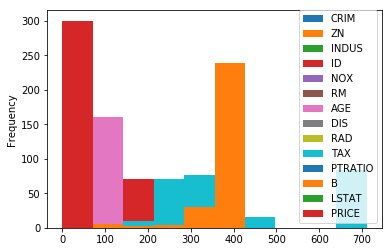

In [5]:
# Choose type of plot appropriately.

# Code Here
data.plot(kind = 'hist')

## Handle Missing Values

For floats, use mean value. For any other types, use the most common value.

In [6]:
# Code Here
for i in data.columns:
    if isinstance(data[i][0], float):
        data[i].fillna(data[i].mean(), inplace= True) # to replace in data itself
    else:
        data[i].fillna(data[i].mode()[0], inplace = True) # select the first from list of modes of the Series

## Map CHAS to numeric form

Note: 'Bound' should map to 1.0 while 'NoBound' should map to 0.0

In [7]:
# Code Here
data.CHAS.replace('NoBound',np.float64(0.0), inplace=True)
data.CHAS.replace('Bound',np.float64(1.0), inplace=True)

In [8]:
# Remove the 'ID' column before moving further

# Code Here
data.drop(["ID"], axis=1, inplace=True)
data.head()
data.shape

(300, 14)

## Ridge Regression 

Perform [Ridge Regression](https://onlinecourses.science.psu.edu/stat857/node/155/) on the data.

(Note: We'll go over Regression and other Machine Learning methods in the next module. You just need to implement the following equation here).

$$
\beta = (X^{T}X + \lambda I)^{-1}X^{T}y
$$

where `X` is the data in the columns apart from 'PRICE' and `y` is the target (i.e 'PRICE').

Use $\lambda = 0.1$

In [9]:
# Code Here
beta = None

data = data.astype(float)
X = data.drop(["PRICE"], axis=1)
X_transpose = X.transpose()
A = np.dot(X_transpose, X) + 0.1*np.identity(X.shape[1])
beta = np.linalg.multi_dot([np.linalg.inv(A), X_transpose, data["PRICE"]])

In [10]:
beta

array([-1.15256270e-01,  3.70355862e-02, -4.01835155e-02,  3.69838325e+00,
       -3.90993891e+00,  6.26324261e+00, -2.70915378e-02, -1.14477261e+00,
        6.41649666e-02, -4.02150093e-03, -4.68970332e-01,  1.54806861e-02,
       -3.45602461e-01])